# Forecast for Airlines data set

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pylab as rcParams
from datetime import datetime

In [2]:
data=pd.read_excel("Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
data.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [8]:
data.shape

(96, 2)

In [9]:
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)
data=data.set_index(['Month'])

In [10]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


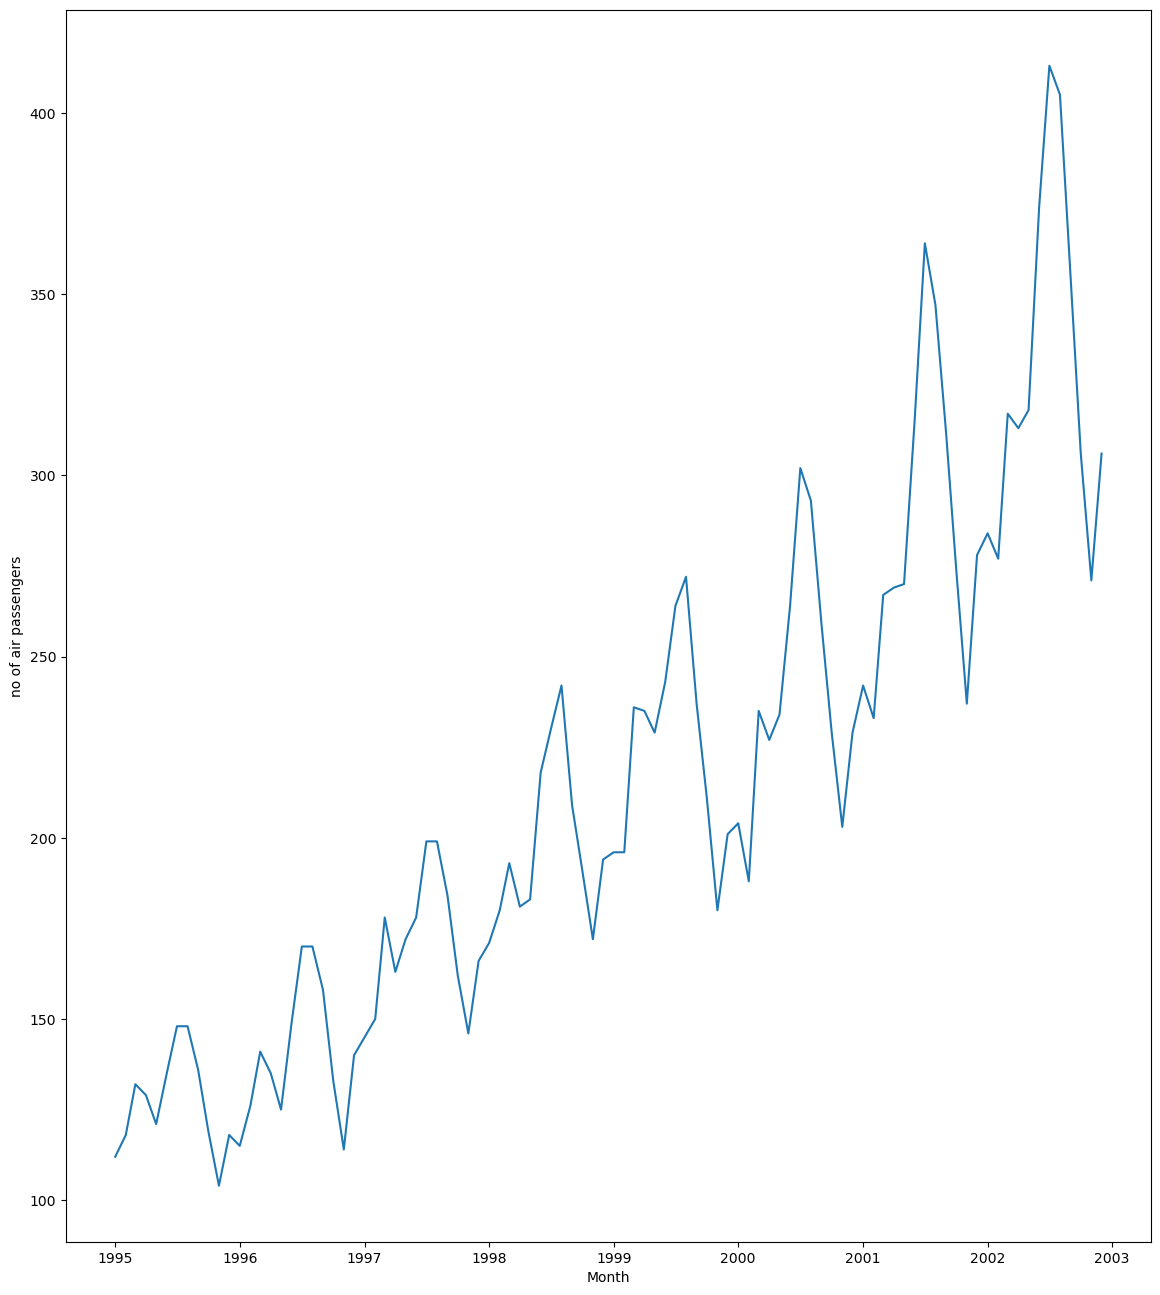

In [11]:
plt.figure(figsize=(14,16))
plt.xlabel('Month')
plt.ylabel('no of air passengers')
plt.plot(data)

In [12]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01  126.666667
1996-01-01  126.916667
1996-02-01  127.583333
1996-03-01  128.333333
            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01   13.720147
1996-01-01   13.453342
1996-02-01   13.166475
1996-03-01   13.686977


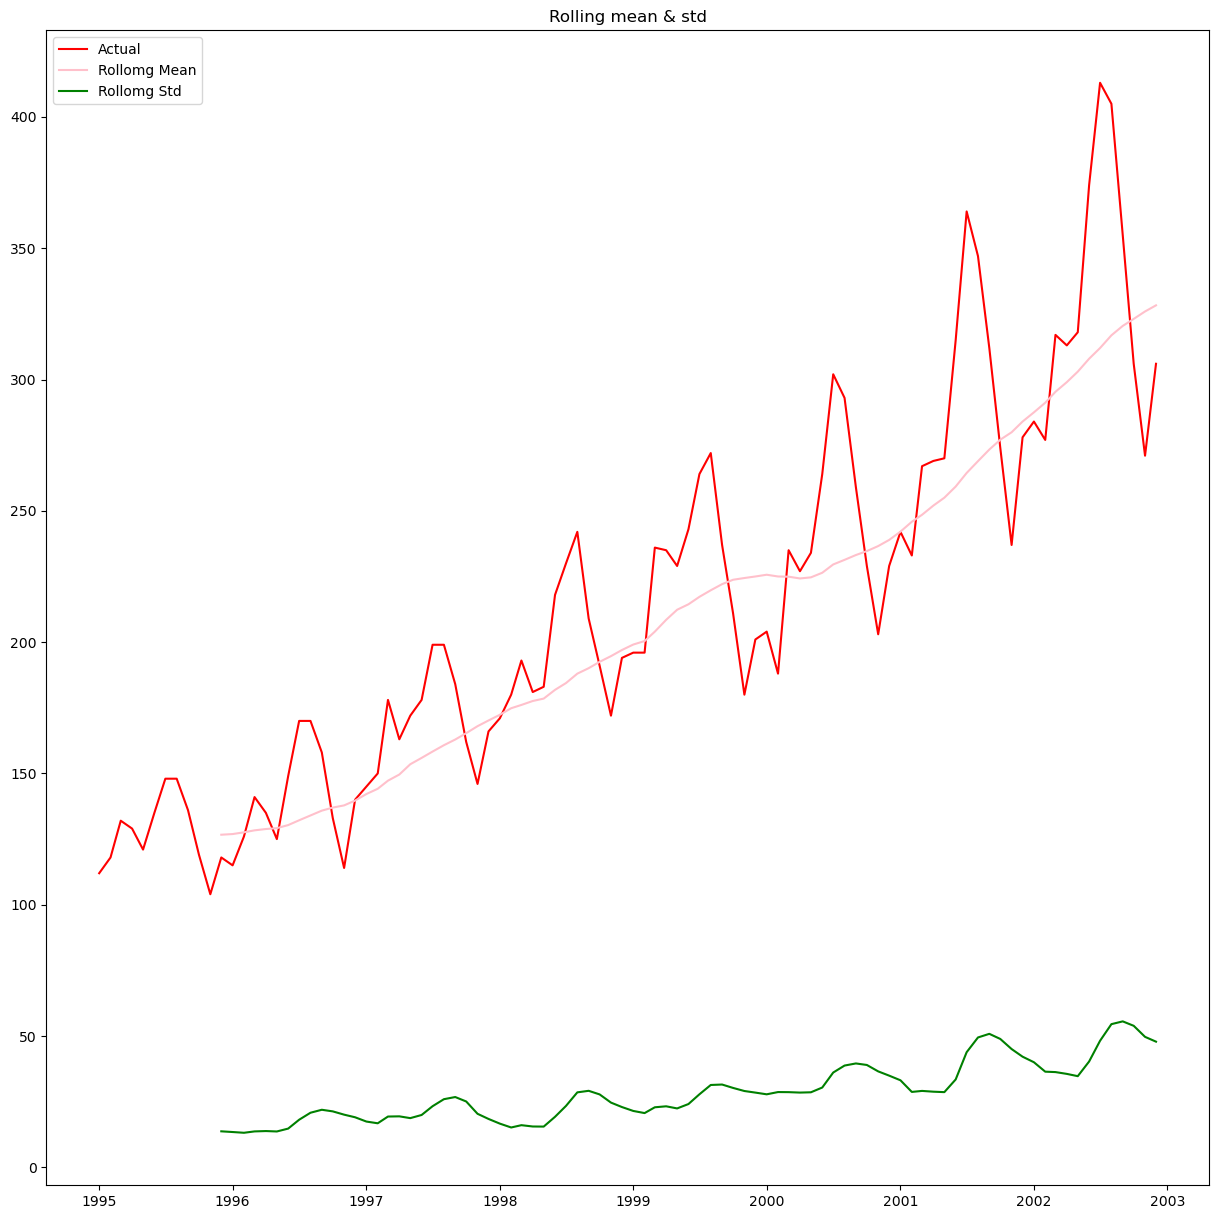

In [13]:
plt.figure(figsize=(15,15))
actual=plt.plot(data,color='red',label='Actual')
mean_6=plt.plot(rolmean,color='pink',label='Rolling Mean')
std_6=plt.plot(rolstd,color='green',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean & std')
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
print('Dickey=Fuller Test:')
dftest=adfuller(data['Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags-Used','no of obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Dickey=Fuller Test:
Test Statistic           1.340248
p-value                  0.996825
Lags-Used               12.000000
no of obs               83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


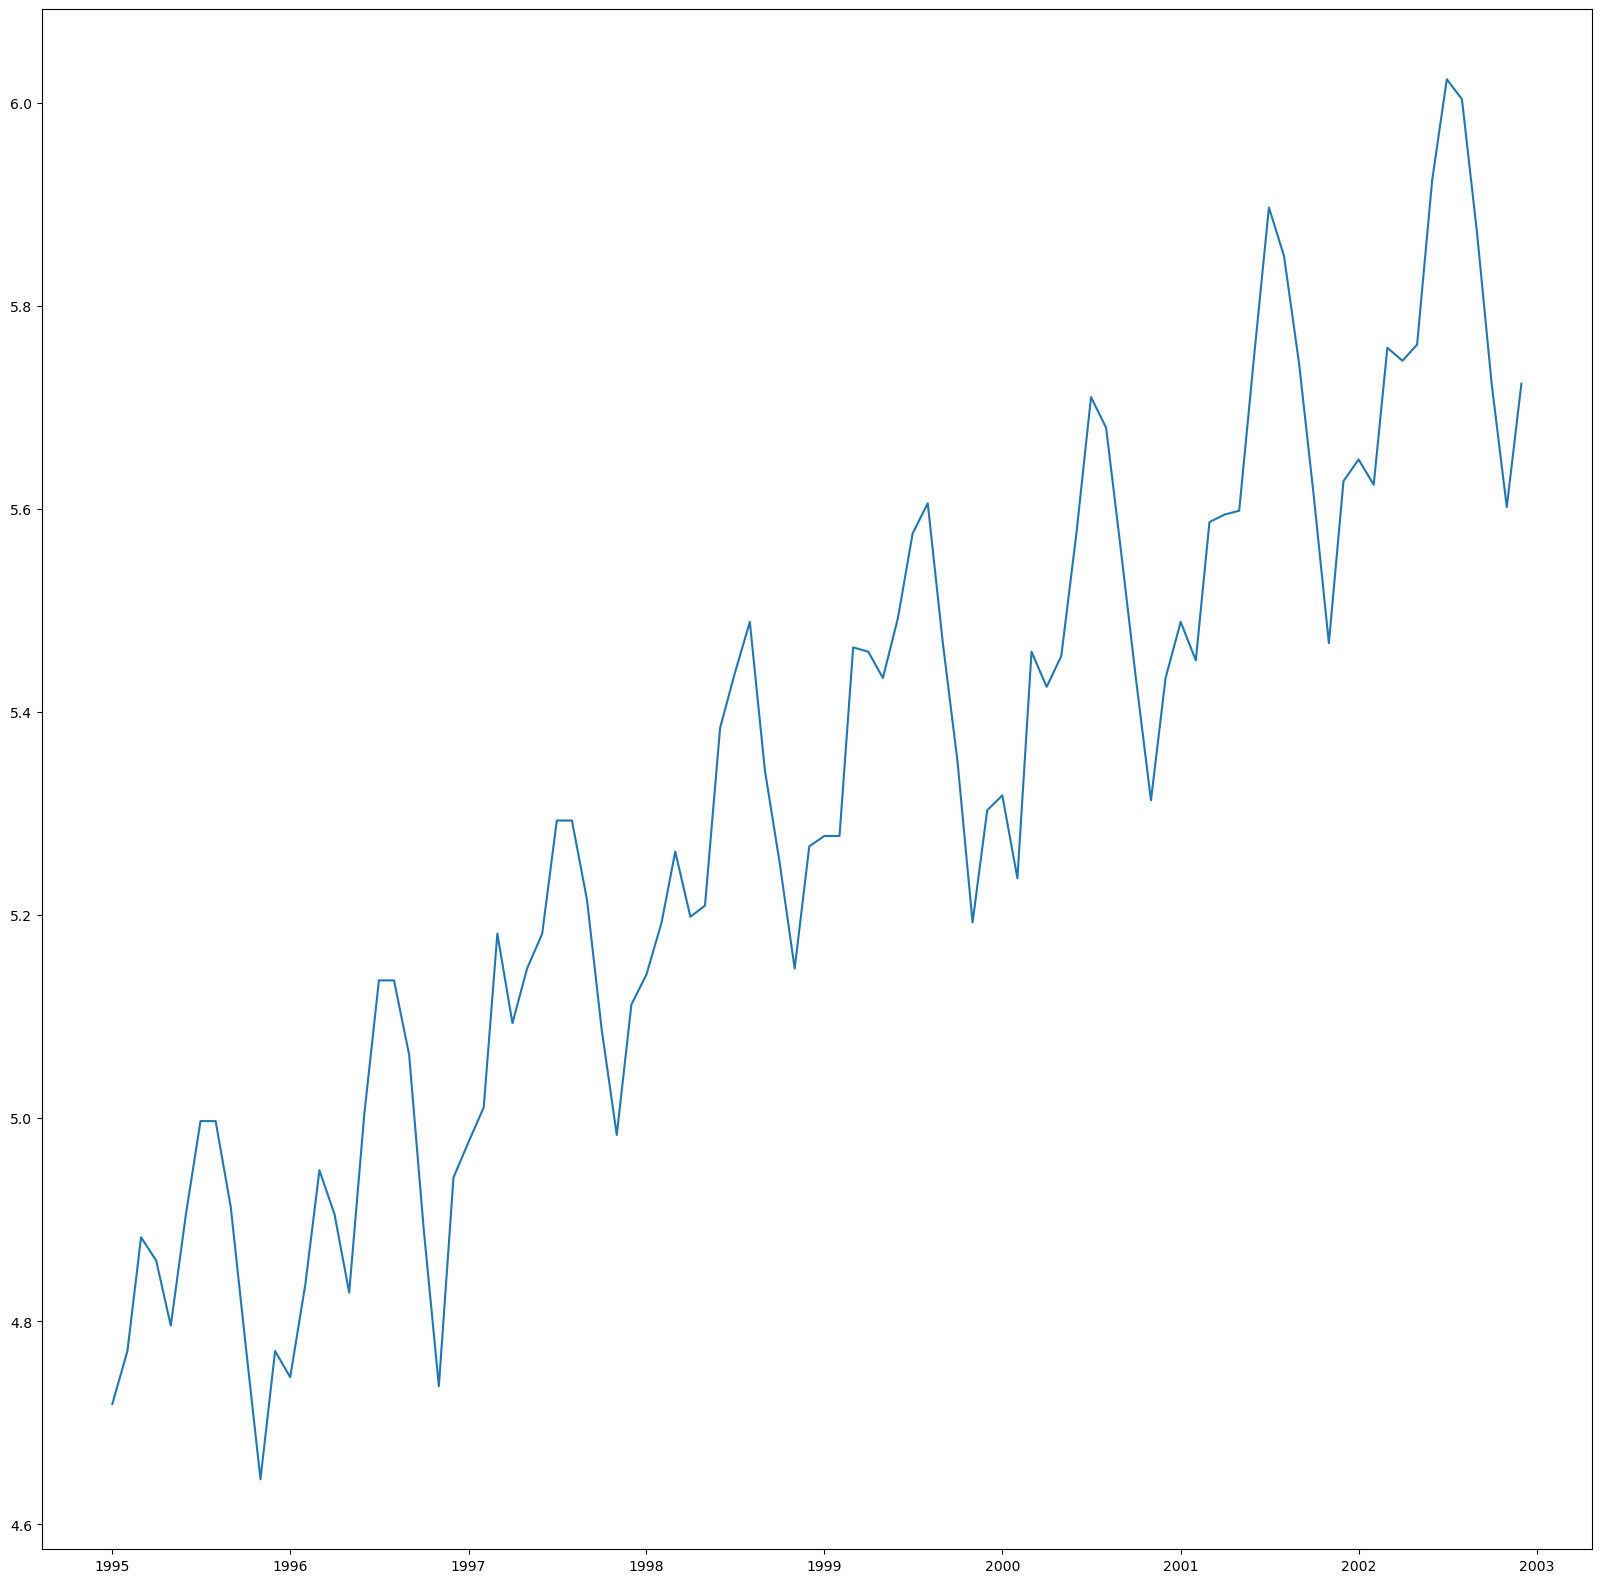

In [15]:
plt.figure(figsize=(20,20))
data_log=np.log(data)
plt.plot(data_log)

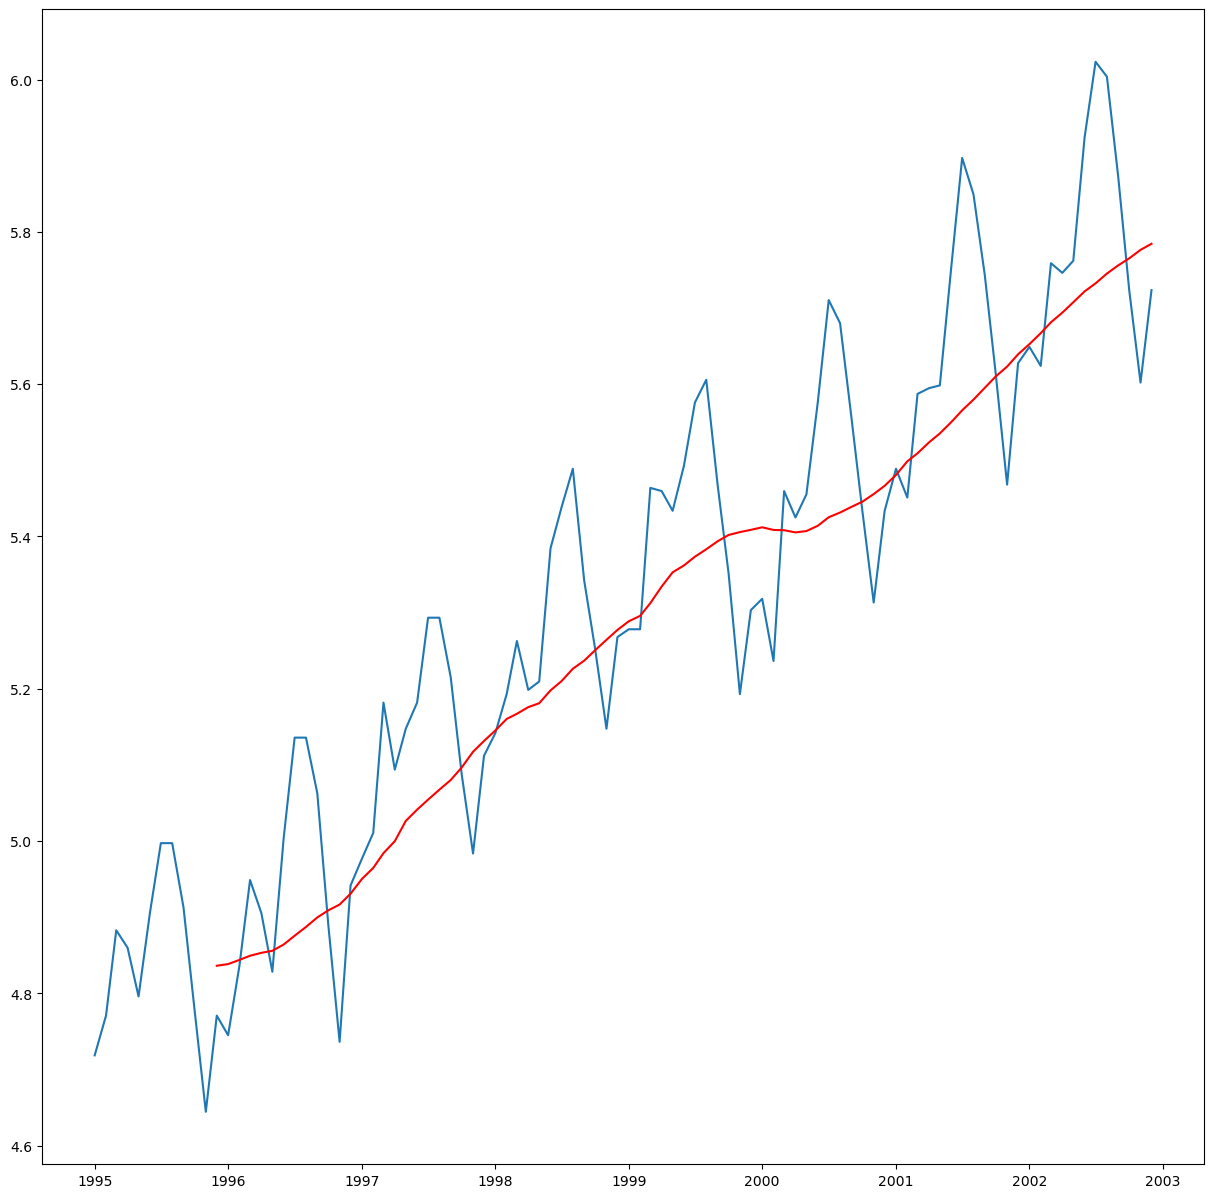

In [17]:
plt.figure(figsize=(15,15))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg,color='red')

In [18]:
data_log_diff=data_log-MAvg
data_log_diff.head(15)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN
1995-06-01,NaN
1995-07-01,NaN
1995-08-01,NaN
1995-09-01,NaN


In [19]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142


In [20]:
def stationarity(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    plt.figure(figsize=(15,15))
    actual=plt.plot(timeseries,color='red',label='Actual')
    mean_6=plt.plot(rolmean,color='pink',label='Rolling Mean')
    std_6=plt.plot(rolstd,color='green',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling mean & std')
    plt.show()
    print('Dickey=Fuller Test:')
    dftest=adfuller(timeseries['Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags-Used','no of obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

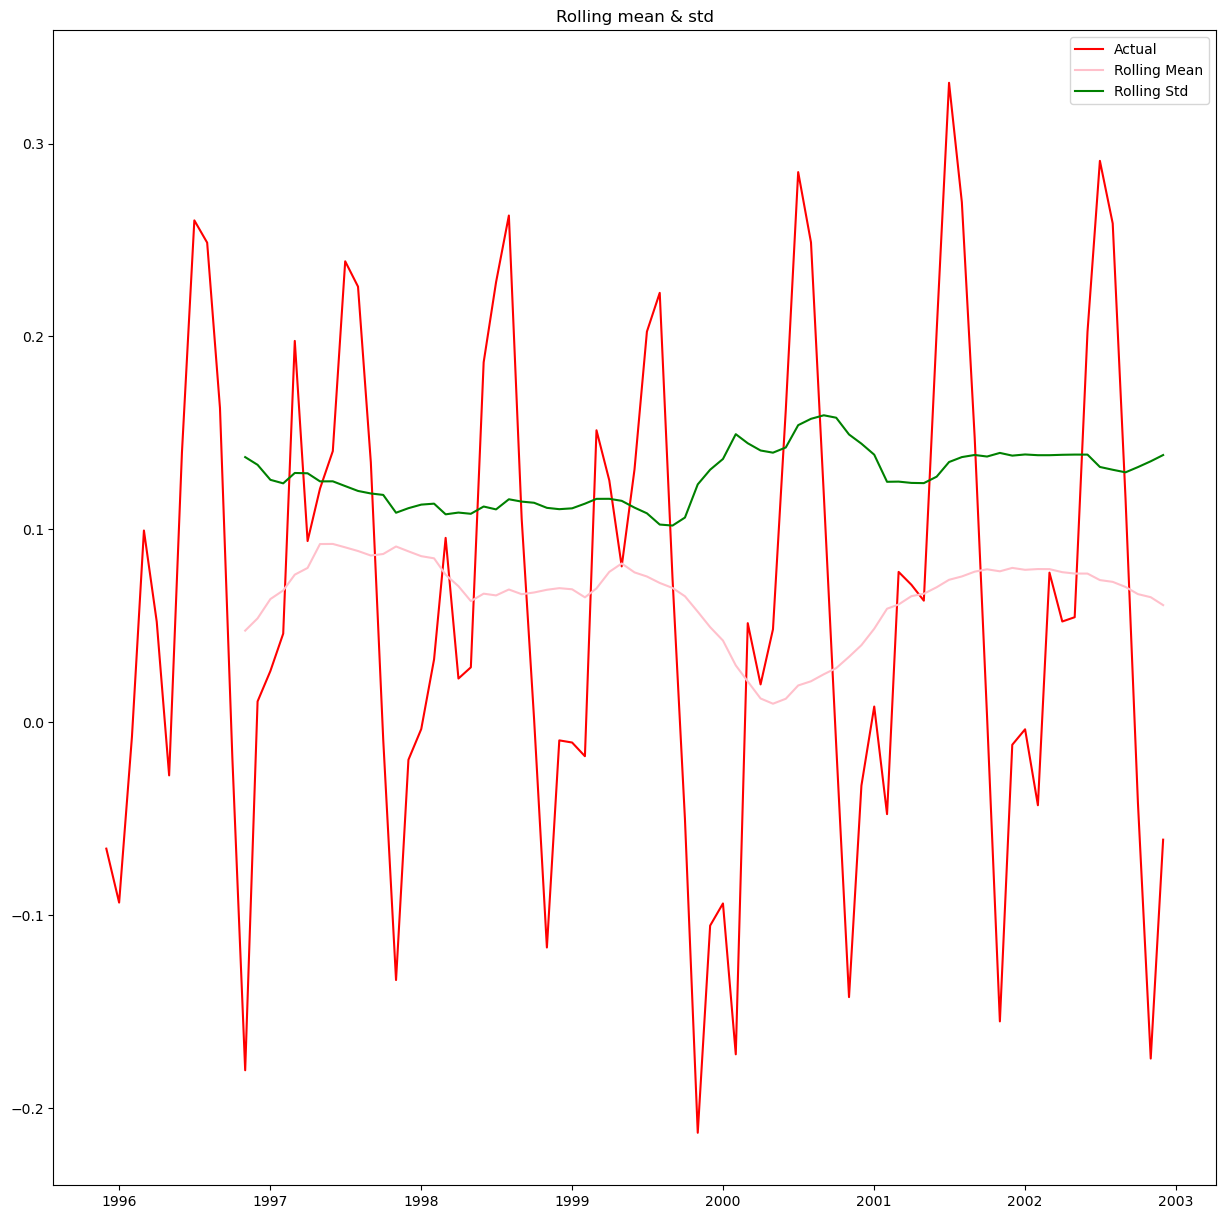

Dickey=Fuller Test:
Test Statistic          -1.910930
p-value                  0.326937
Lags-Used               12.000000
no of obs               72.000000
Critical Value (1%)     -3.524624
Critical Value (5%)     -2.902607
Critical Value (10%)    -2.588679
dtype: float64


In [22]:
stationarity(data_log_diff)

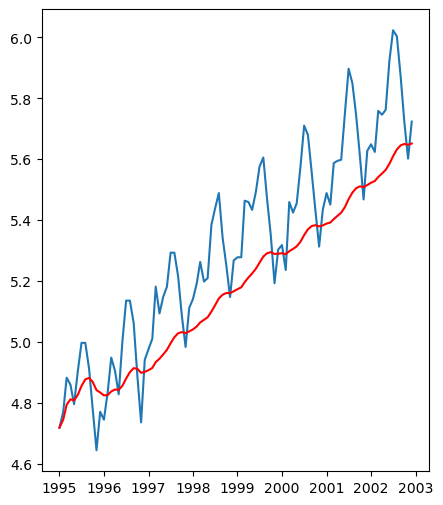

In [23]:
plt.figure(figsize=(5,6))
exp_data=data_log.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data,color='red')

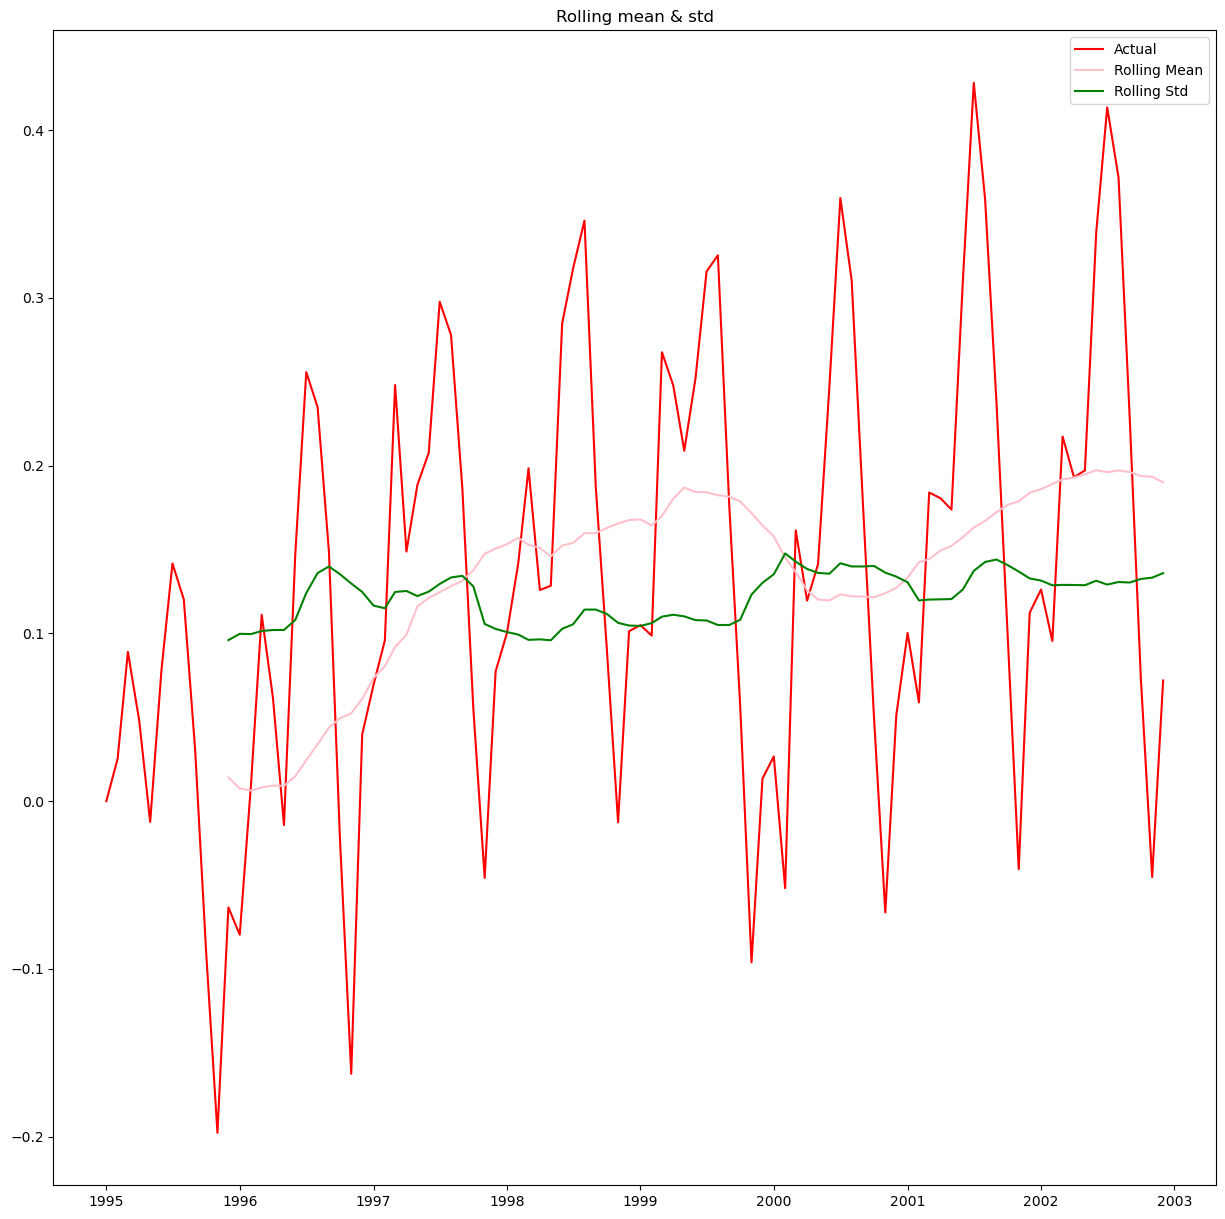

Dickey=Fuller Test:
Test Statistic          -2.835036
p-value                  0.053441
Lags-Used               12.000000
no of obs               83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


In [24]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

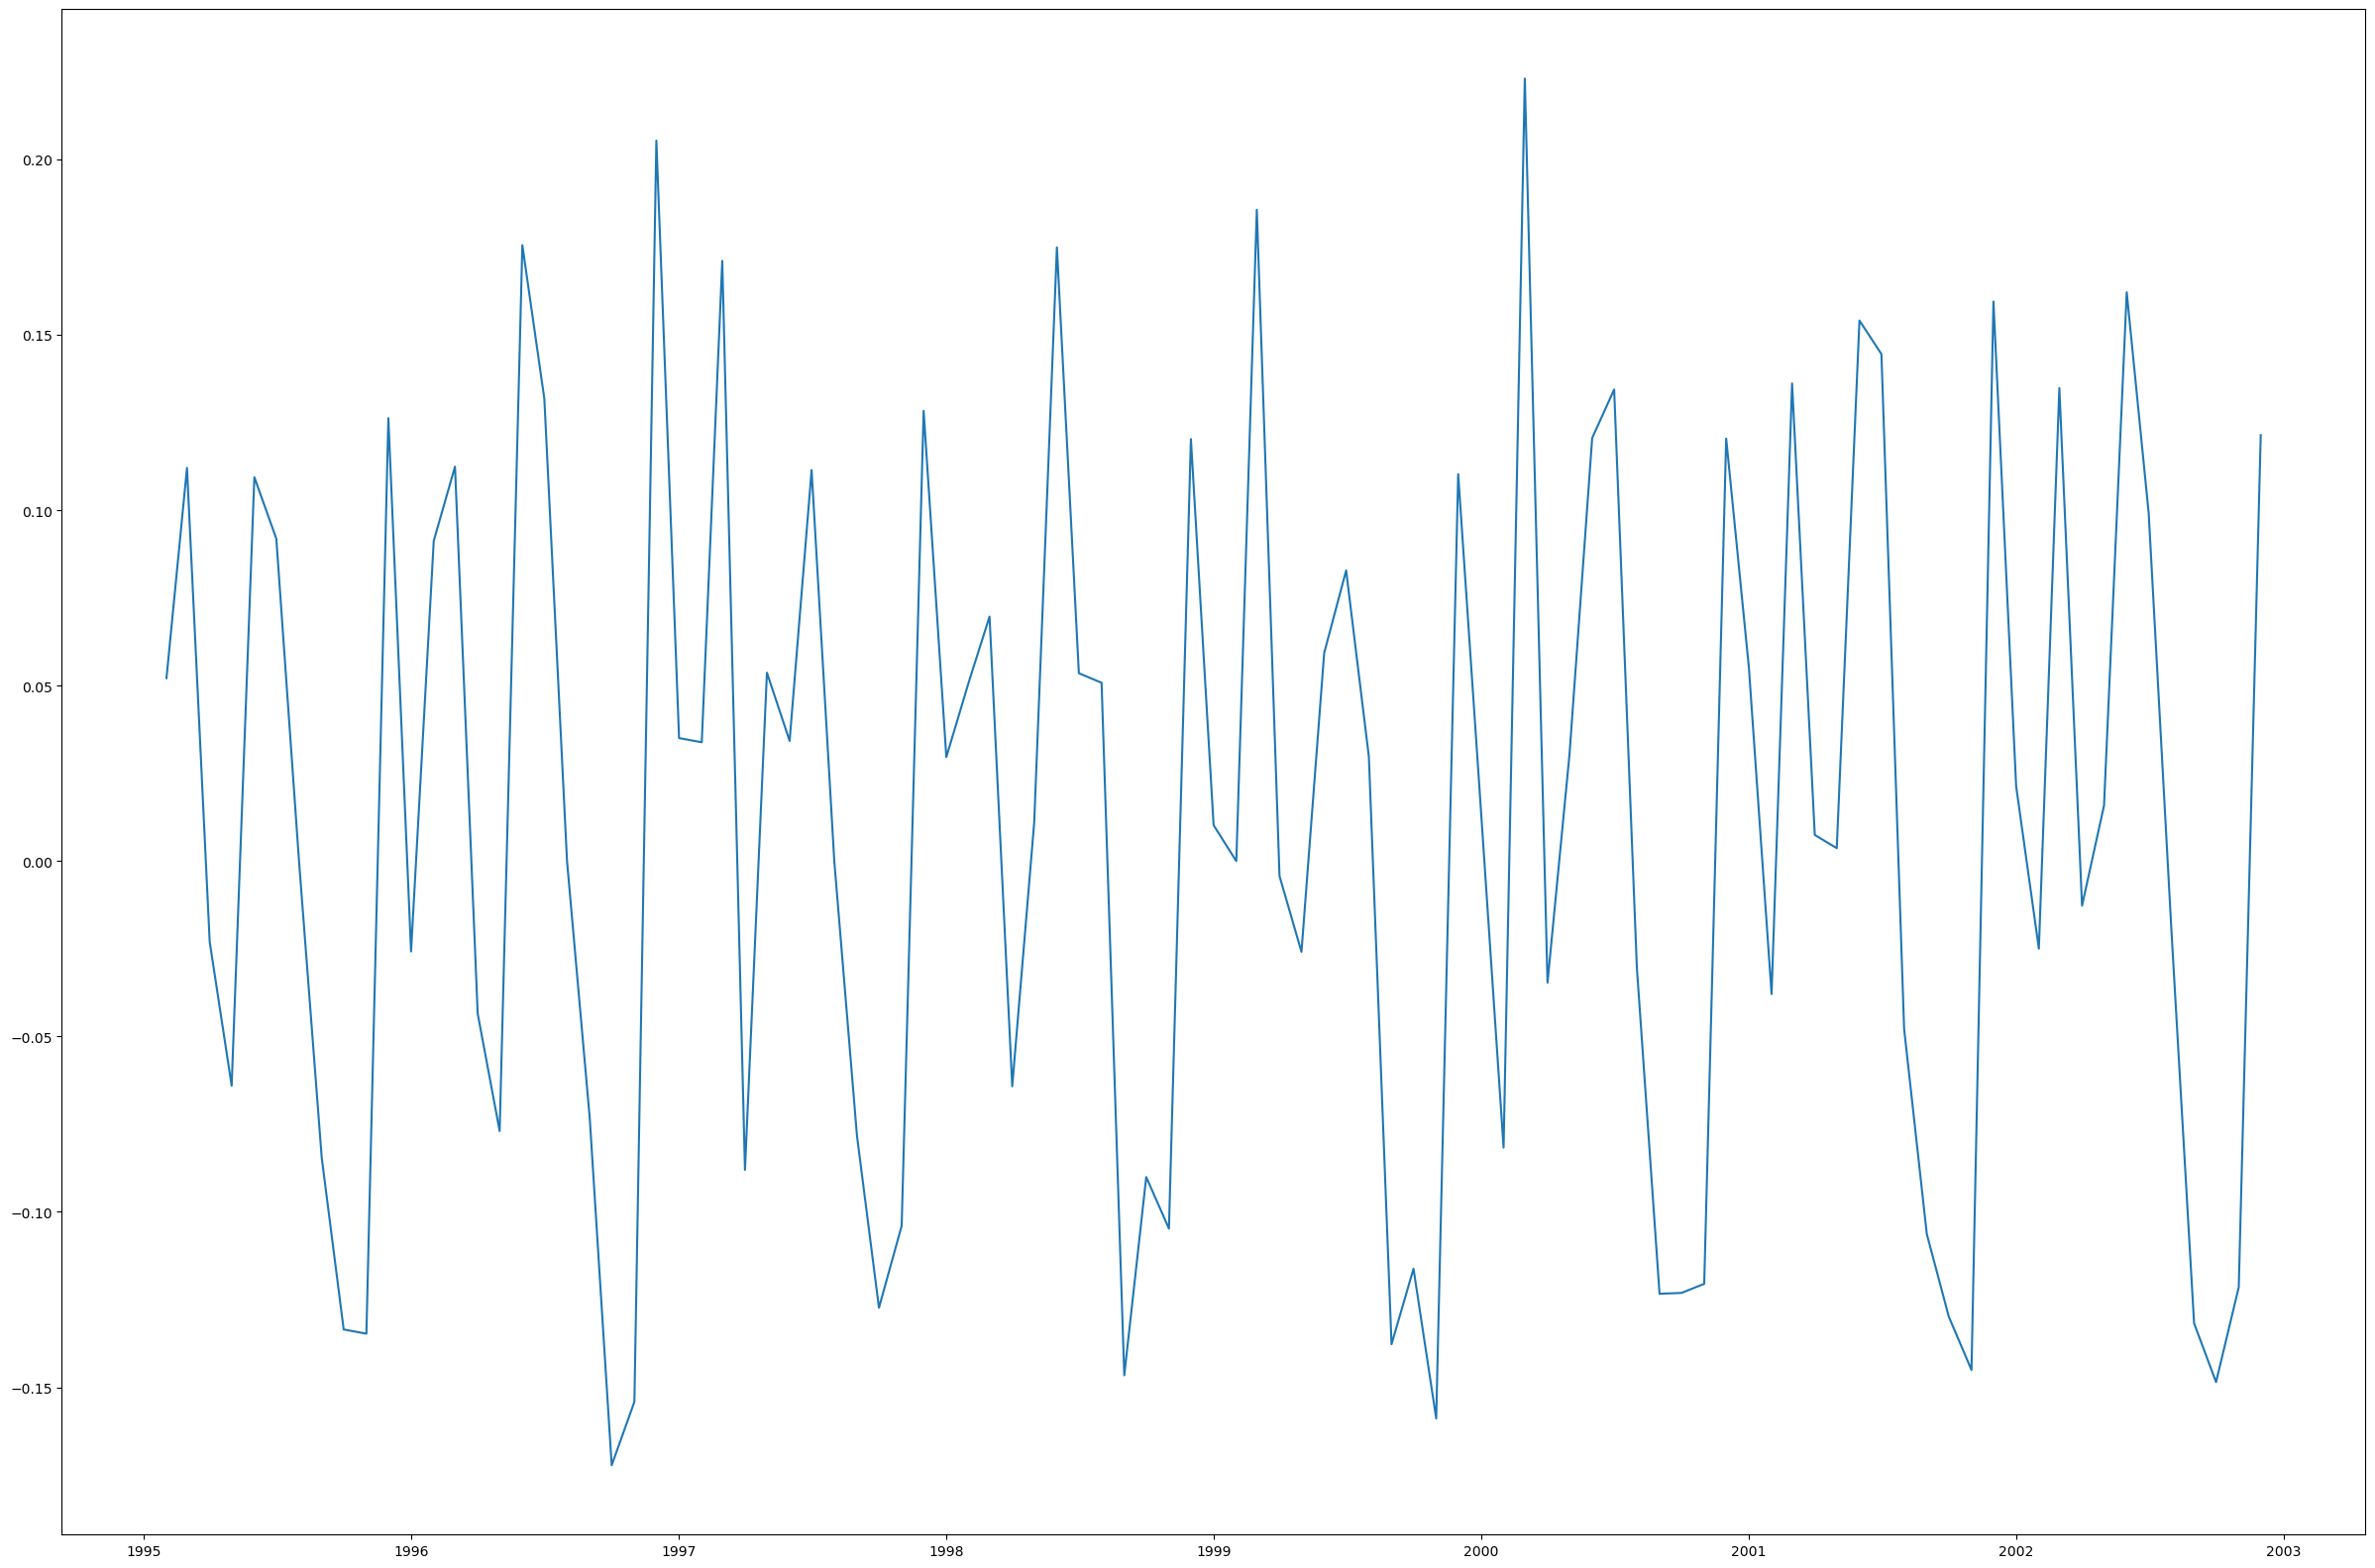

In [29]:
plt.figure(figsize=(30,20))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

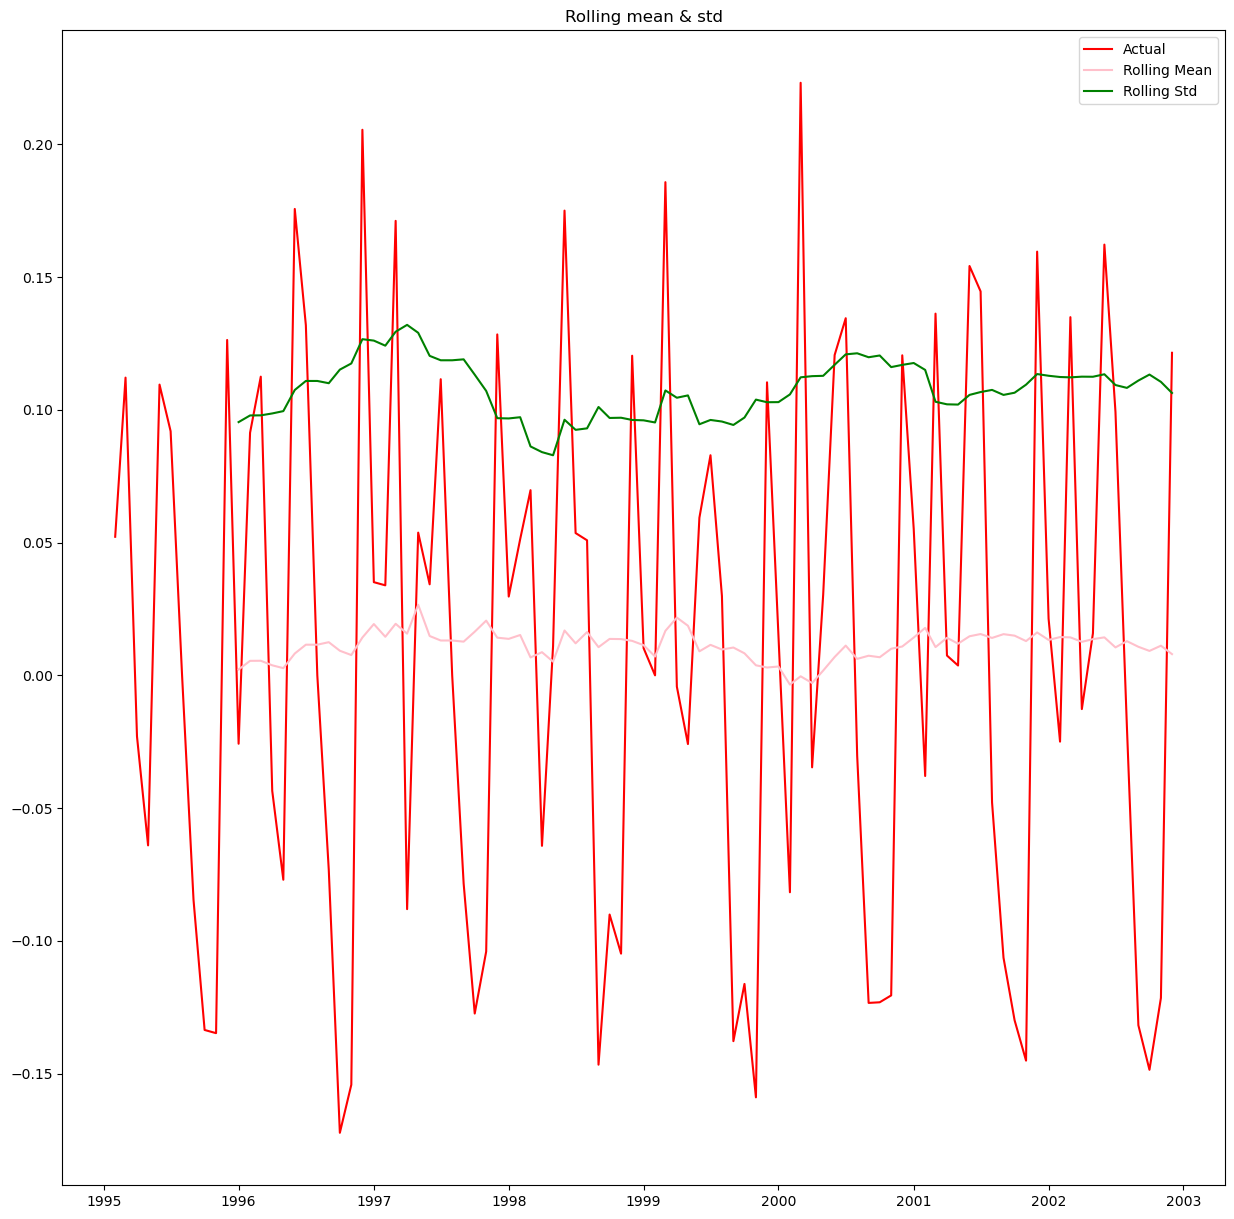

Dickey=Fuller Test:
Test Statistic          -2.670823
p-value                  0.079225
Lags-Used               12.000000
no of obs               82.000000
Critical Value (1%)     -3.512738
Critical Value (5%)     -2.897490
Critical Value (10%)    -2.585949
dtype: float64


In [30]:
data_shift=data_shift.dropna()
stationarity(data_shift)

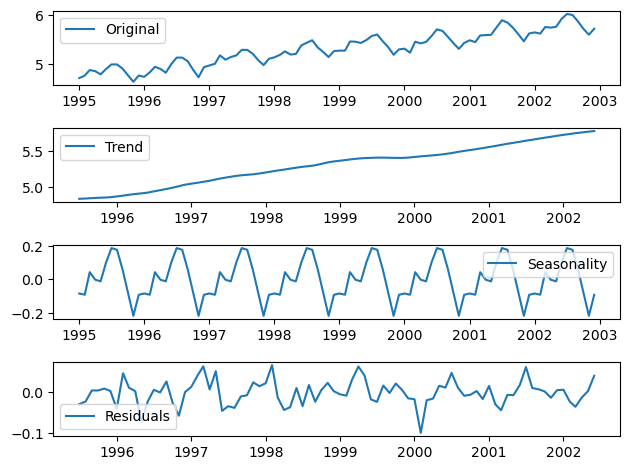

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


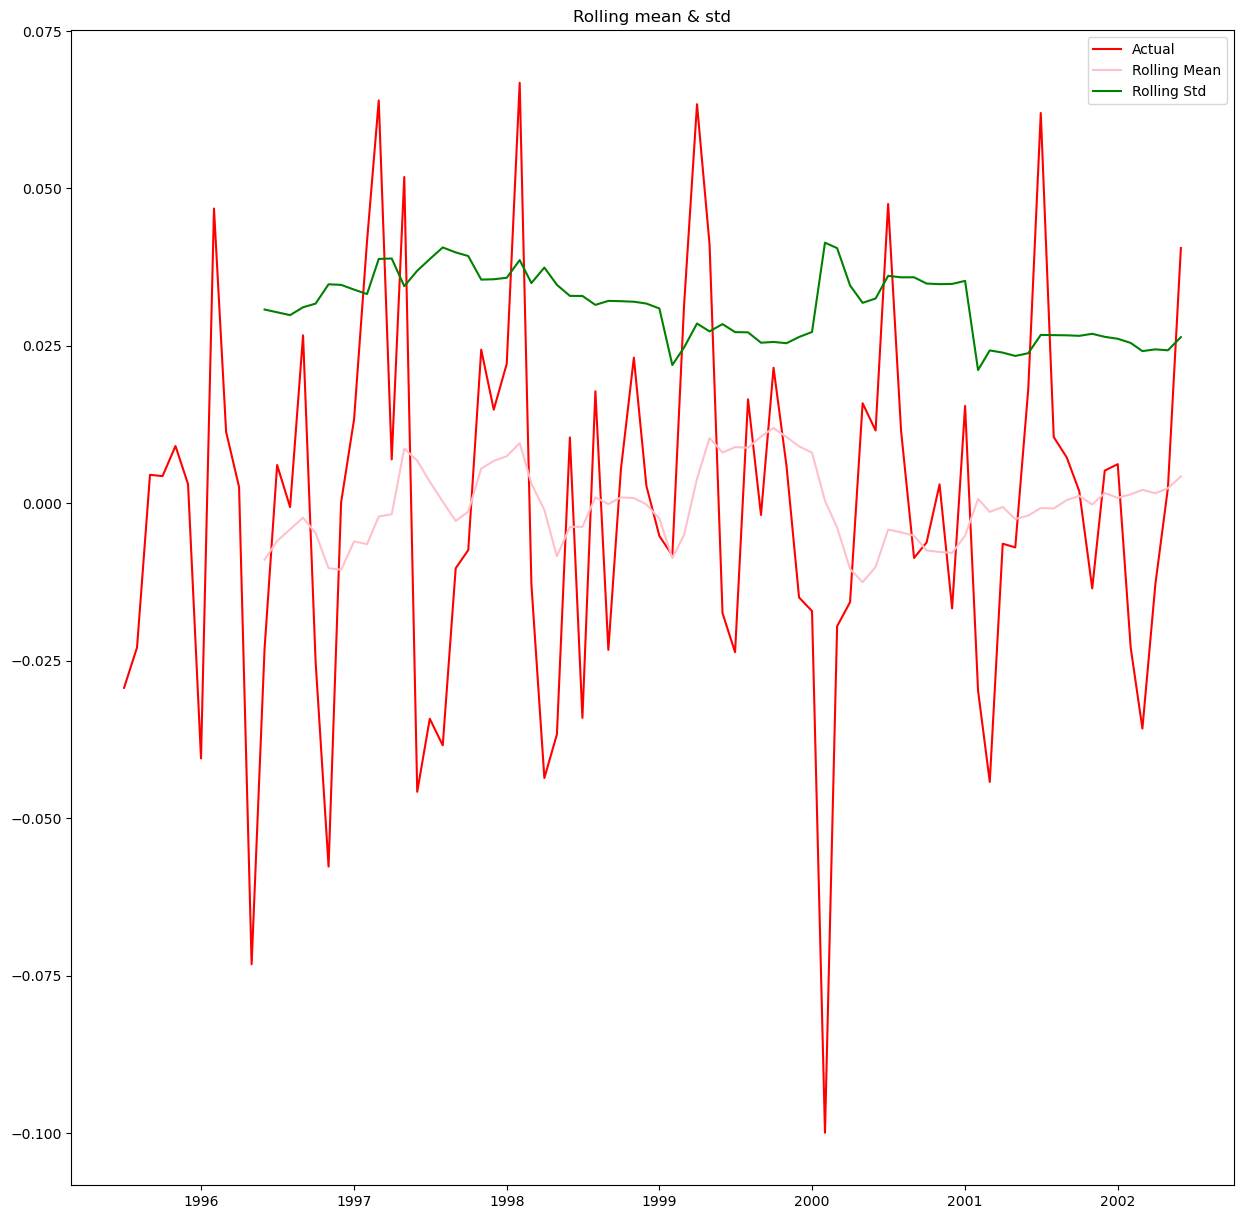

Dickey=Fuller Test:


KeyError: 'Passengers'

In [36]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

In [42]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(data_shift,nlags=20)
lag_pacf=pacf(data_shift,nlags=20,method='ols')

Text(0.5, 1.0, 'autocorrelation fun')

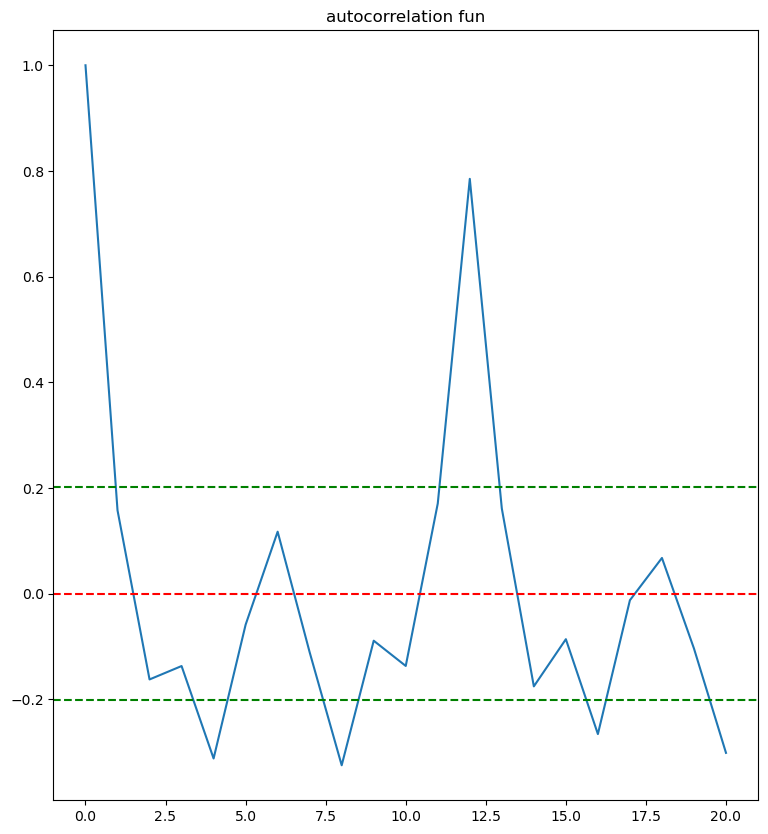

In [44]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('autocorrelation fun')

Text(0.5, 1.0, 'autocorrelation fun')

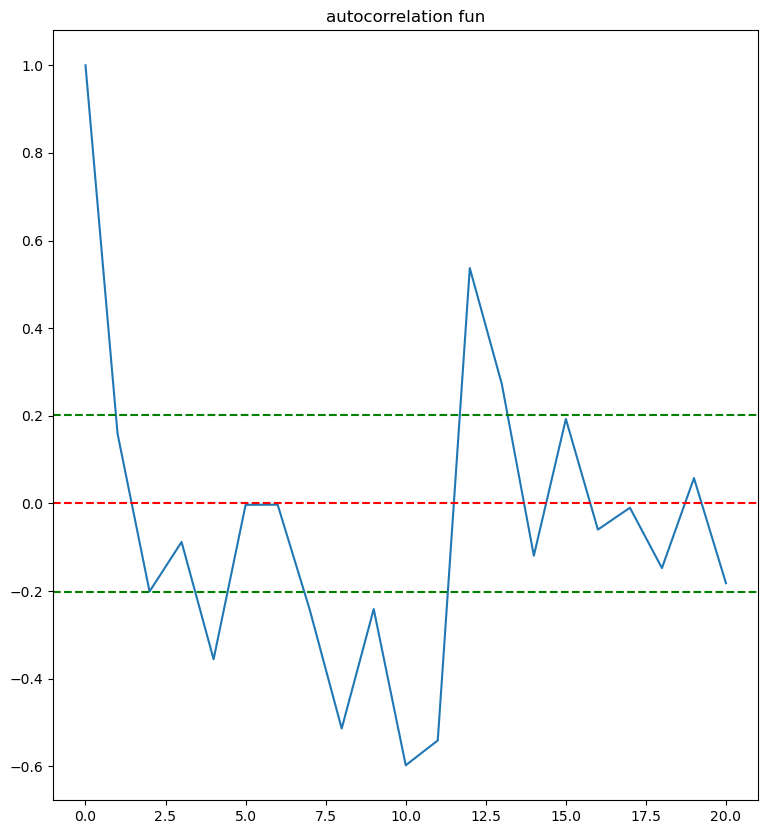

In [45]:
plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('autocorrelation fun')

# ARIMA model

In [46]:
from statsmodels.tsa.arima_model import ARIMA

D:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


plotting ARIMA model


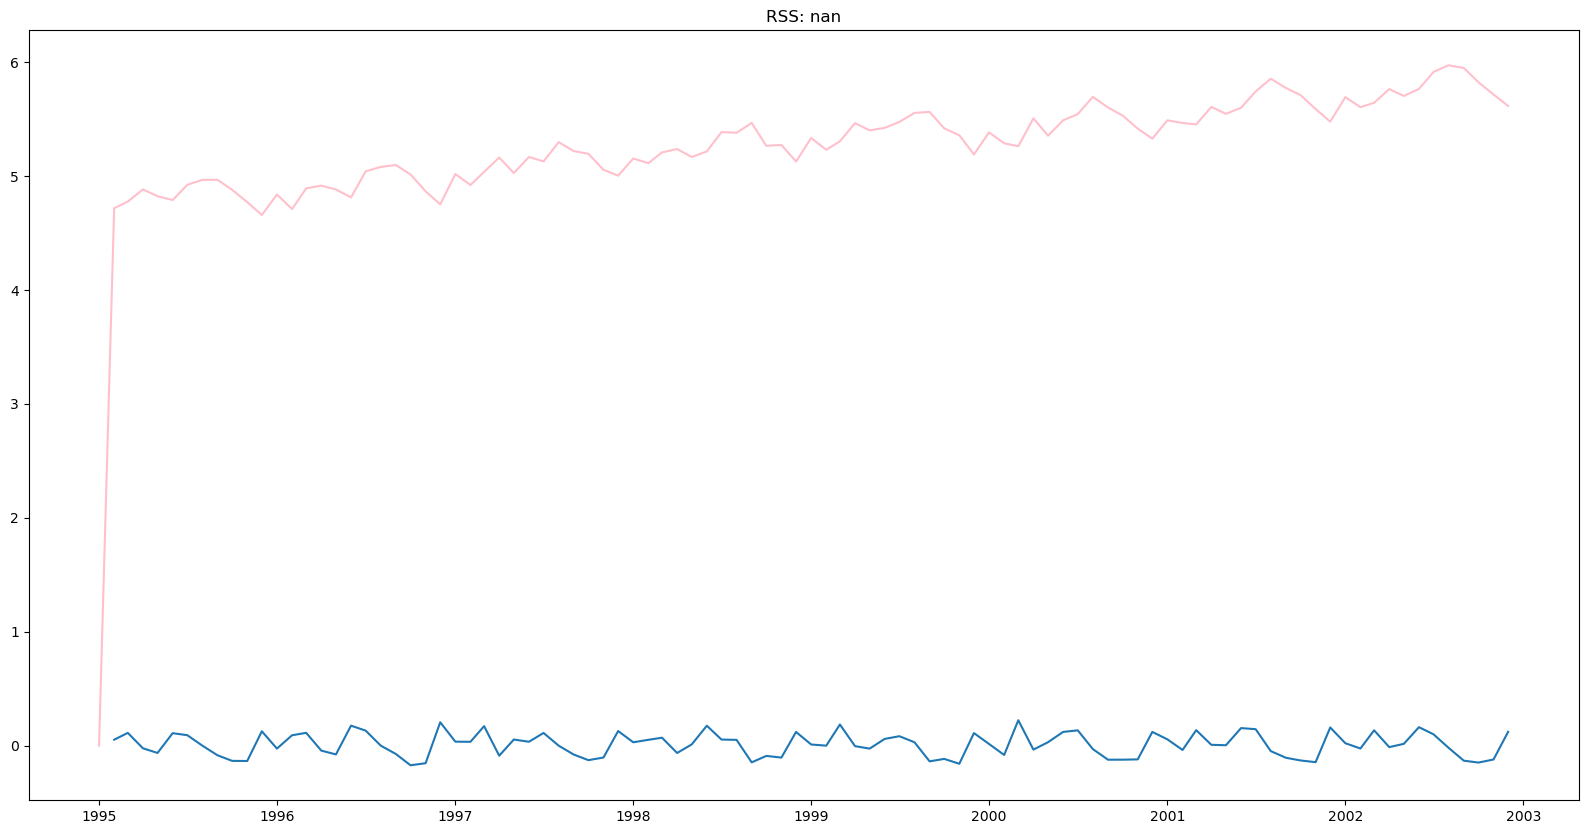

In [106]:
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log,order=(2,1,2))
results = model.fit()
plt.plot(data_shift)
plt.plot(results.fittedvalues,color='pink')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

In [102]:
predictions=pd.Series(results.fittedvalues,copy=True)
print(predictions)

Month
1995-01-01    0.000000
1995-02-01    4.718499
1995-03-01    4.776290
1995-04-01    4.882909
1995-05-01    4.823610
                ...   
2002-08-01    5.973022
2002-09-01    5.948924
2002-10-01    5.824508
2002-11-01    5.716528
2002-12-01    5.615865
Length: 96, dtype: float64


In [103]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1995-01-01     0.000000
1995-02-01     4.718499
1995-03-01     9.494789
1995-04-01    14.377698
1995-05-01    19.201308
dtype: float64


In [108]:
predictions_log=pd.Series(data_log['Passengers'])
predictions_lod=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1995-01-01    4.718499
1995-02-01    4.770685
1995-03-01    4.882802
1995-04-01    4.859812
1995-05-01    4.795791
Name: Passengers, dtype: float64

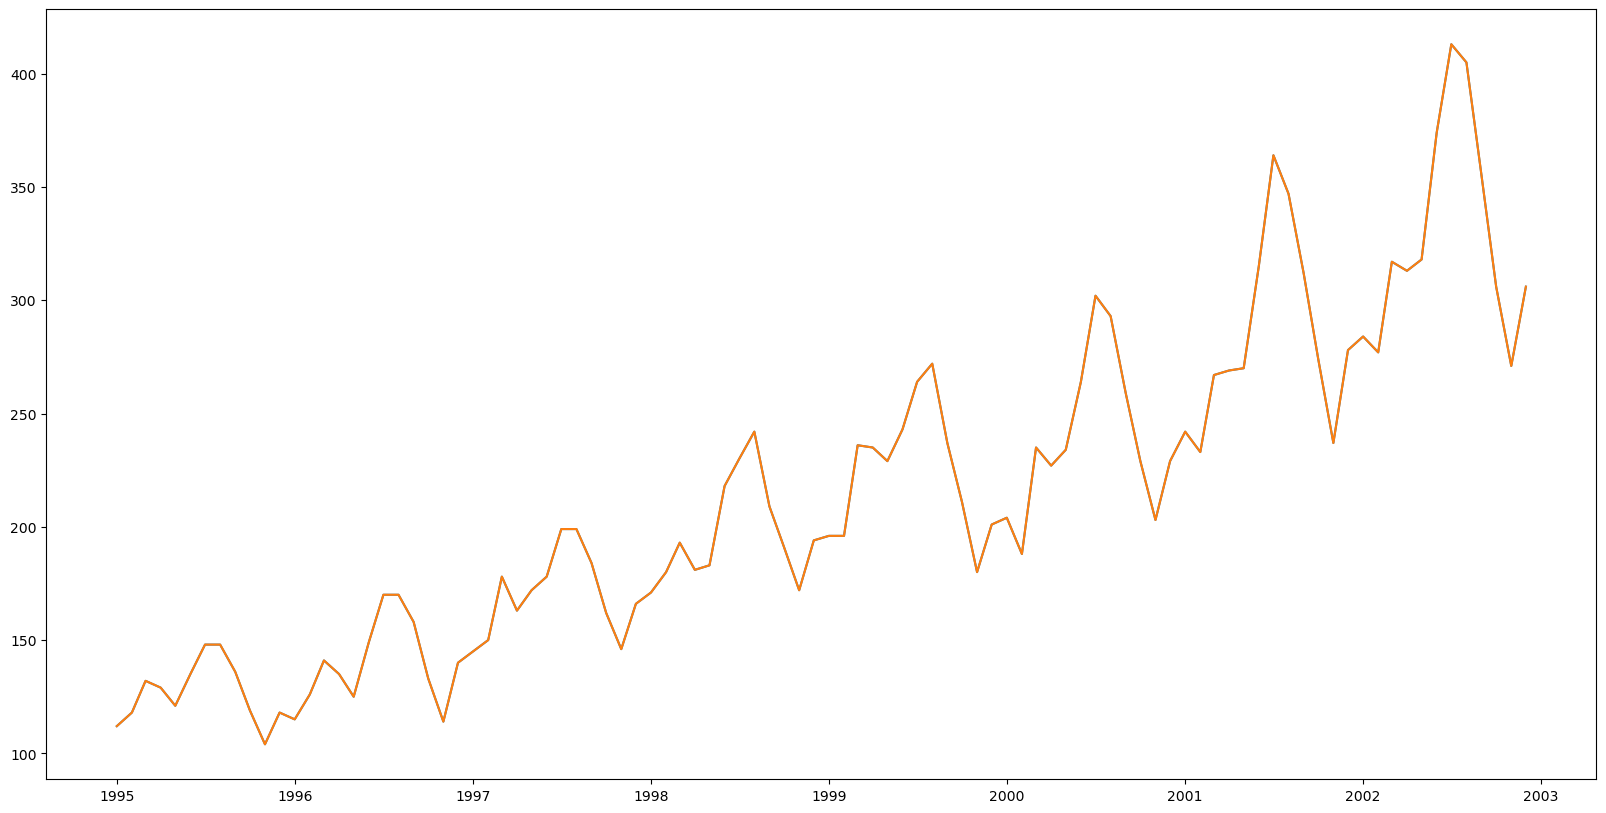

In [109]:
predictions_ARIMA=np.exp(pd.Series(data_log['Passengers']))
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

In [116]:
results.forecast(steps=120)

2003-01-01    5.785472
2003-02-01    5.763408
2003-03-01    5.768749
2003-04-01    5.766118
2003-05-01    5.766369
                ...   
2012-08-01    5.765648
2012-09-01    5.765648
2012-10-01    5.765648
2012-11-01    5.765648
2012-12-01    5.765648
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64